# Vectorization and Level Operations Lab
All  of  the  programming  assignments  are  to  be  done  in  Python  using  additional  libraries  specified  in  the  assignments.  There  are many  libraries  available,  some  of  which  we  will  be  using,  and  you  are  welcome  to  use  them  with  one  exception:  if  the  library  or  a  function  within  it  performs  the  specific  function  you  are  asked  to  code,  you  may  not  use  that  other  than  perhaps  as  a  reference  to  compare  against. All  of  the  code  you  submit  must  be  your  own. You are welcome to turn in a completed jupyter notebook.

**The purpose of this lab is to learn how to use the vectorization features of Numpy. You are not allowed to use a for or while loop for any part of this lab. Any use of a for or while loop will cost points.**

The following code will load the grayscale image you can use for this lab. If needed, make sure to install PIL using *pip install PIL* or *conda install PIL*.

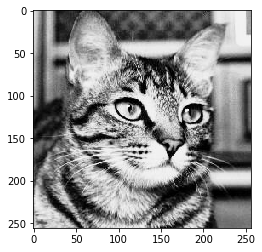

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

cat = plt.imread('cat.jpg')
cat = np.matrix(cat,dtype=np.int32)
plt.imshow(cat,cmap="Greys_r", vmin=0)
plt.show()

Implement each of the following functions.

## Function 1: Brightness Adjust
Takes in a grayscale image and returns the brightened version of that image according to a passed in parameter. Use a max image value of 255.

In [ ]:
def brightAdjust(image, c):
    return None



In [ ]:
#Test Cases
bright_cat = brightAdjust(cat, 100)
plt.imshow(bright_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Bright Cat");plt.show()
dark_cat = brightAdjust(cat, -100)
plt.imshow(dark_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Dark Cat");plt.show()

## Function 2: Contrast Adjustment
Takes in a grayscale image and returns the contrasted version of that image according to a passed in parameter. Use a max image value of 255.

Also, rather than a straight linear operation, we will use a mapping similar to what Photoshop does. In particular, the contrast will be in the range [-100,100] where 0 denotes no change, -100 denotes complete loss of contrast, and 100 denotes maximum enhancement (8x multiplier). If *c* is the contrast parameter, then the level operation applied is:

$$s = \left(\frac{c+100}{100}\right)^4 (r-128) + 128$$

Make sure you work in floating point, not integers. Integer division would not be very acurate.

In [ ]:
def contrastAdjust(image,c):
    return None



In [ ]:
#Test Cases
high_contrast_cat = contrastAdjust(cat, 50)
plt.imshow(high_contrast_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("High Contrast Cat");plt.show()
low_contrast_cat = contrastAdjust(cat, -50)
plt.imshow(low_contrast_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Low Contrast Cat");plt.show()

## Function 3: Thresholding
Takes in a grayscale image and returns the thresholded version of the image according to a passed in parameter. Every pixel that is higher than or equal to the parameter is 255, everything below is zero. (Hint: Use np.where)

In [ ]:
def thresholder(image, c):
    return None


In [ ]:
#Test Cases
thresholded_cat = thresholder(cat, 80)
plt.imshow(thresholded_cat, cmap="Greys_r",vmin=0, vmax=255);plt.title("Thresholded Cat");plt.show()

## Function 4: Cropping
Takes in a grayscale image, an x and y of a topleft pixel, a width, and a height and returns a cropped version of that image according to those parameters.

In [ ]:
def cropper(image, width, height, x=0, y=0):
    return None



In [ ]:
#Test Cases

#This should show just the ear of the cat
cropped_cat1 = cropper(cat, 100, 100)
plt.imshow(cropped_cat1, cmap="Greys_r",vmin=0, vmax=255);plt.title("Cropped Cat 1");plt.show()
#This should show just the eyes of the cat
cropped_cat2 = cropper(cat, 120, 75, 90, 80)
plt.imshow(cropped_cat2, cmap="Greys_r",vmin=0, vmax=255);plt.title("Cropped Cat 2");plt.show()

## Function 5: Scaling
Takes in a grayscale image and returns the same image with a resolution that is half the width and half the height of the original. (Hint: Think about what pixels you will want to grab to make that smaller image)

In [ ]:
def scaler(image):
    return None



In [ ]:
#This line makes the image easier to see.
%matplotlib notebook

scaled_cat = scaler(cat)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cat, cmap="Greys_r",vmin=0, vmax=255); ax1.set_title("Original")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(scaled_cat, cmap="Greys_r",vmin=0, vmax=255); ax2.set_title("Scaled")
plt.show()

Run the following line of code once you are done to return back to normal plotting functions.

In [ ]:
%matplotlib inline

## Application: Light Fields

Light fields are a special type of image that takes a view from multiple angles simultaneously. For example, in the light field image below, we can see the same bird from slightly different angles. We have 9 different angles in the y direction and 9 different angles in the x direction, for a total of 81 different views.

In [ ]:
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

filename = "lightfield.jpg"
lf = imread(filename)

#Specify appeture height and width
h = 9
w = 9

#Plot original light field
plt.imshow(lf, vmin=0, cmap="Greys_r")
plt.show()

## Function 6 - Eliminating For Loops

With light fields, it is common to get a combined image by taking the average pixel value from every view (you can think of it at the "average view" or what a regular camera would have taken). For example, if we had a light field with 4 views, we could find the average image pixel by taking

$$ image[r,c] = \frac{image_{0,0}[r,c] + image_{0,1}[r,c] + image_{1,0}[r,c] + image_{1,1}[r,c]}{4} $$

The code below does this process for you, but it is incredibly slow.

**Using vectorization, rewrite the code below and eliminate the two inner for loops.**

Extra Credit: Eliminate all for loops (Hint: use np.reshape())

In [ ]:
%matplotlib inline
%matplotlib notebook

from tqdm import tqdm

rows, cols = np.shape(lf)

#Find it's physical size
im_h = int(rows/h)
im_w = int(cols/w)

snapshot = np.zeros((im_h, im_w))

for y in tqdm(range(im_h)):
    for x in range(im_w):
        result = 0
        for row in range(h):
            for col in range(w):
                r = row*im_h + y
                c = col*im_w + x
                result += lf[r,c]

        snapshot[y,x] = result/(h*w)

plt.imshow(snapshot, vmin=0, cmap="Greys_r")
plt.show()